In [1]:
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import torch.nn as nn
from torchviz import make_dot

# Load data from CSV file into a DataFrame
df = pd.read_csv('data.csv')


In [2]:
df

,HTC,flow_rate,conc_nano,Kfluid,heat_flux,X_D,HTC_ANN1,HTC_ANN2
0,2173,0.000013,0.000,0.604,26526,35,2284.536885,2217.244340
1,2599,0.000013,0.005,0.604,26526,35,2556.291873,2540.071679
2,2883,0.000013,0.010,0.604,26526,35,2875.415903,2846.506904
3,3235,0.000013,0.015,0.604,26526,35,3240.209815,3227.271372
4,2097,0.000013,0.000,0.604,26526,85,2135.918709,2008.223118
5,2279,0.000013,0.005,0.604,26526,85,2281.140775,2245.132236
6,2495,0.000013,0.010,0.604,26526,85,2486.851164,2477.036225
7,2756,0.000013,0.015,0.604,26526,85,2791.436147,2785.863646
8,2014,0.000013,0.000,0.604,26526,133,2031.603644,1994.755998
9,2181,0.000013,0.005,0.604,26526,133,2189.662208,2175.604507


In [3]:
X = df[['flow_rate', 'conc_nano', 'Kfluid', 'heat_flux', 'X_D']]
y = df['HTC'] # heat transfer Cofficent
y

0     2173
1     2599
2     2883
3     3235
4     2097
5     2279
6     2495
7     2756
8     2014
9     2181
10    2380
11    2617
12    1925
13    2078
14    2258
15    2472
16    3039
17    3433
18    3944
19    4635
20    2975
21    3353
22    3842
23    4497
24    2895
25    3254
26    3713
27    4323
28    2802
29    3137
30    3563
31    4123
32    2198
33    2453
34    2775
35    3193
36    2503
37    3086
38    3492
39    4022
40    1618
41    1844
42    2141
43    2554
44    1178
45    1359
46    1515
47    1710
48    1033
49    1170
50    1283
51    1421
52     919
53    1067
54    1160
55    1272
Name: HTC, dtype: int64

In [4]:
# Split data to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data
# Fix scales
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_test = torch.tensor(scaler.transform(X_test), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Normalize inputs and targets to zero mean and unity standard deviation
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
y_train = (y_train - y_train.mean()) / y_train.std()
y_test = (y_test - y_test.mean()) / y_test.std()

# Define the neural network
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Define the neural network with ReLU activation function
class ReLUModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.linear = nn.Identity()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.linear(x)
        return x

# Define the neural network with Tanh activation function
class TanhModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10, 1)
        self.linear = nn.Identity()

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.linear(x)
        return x

# Define the neural network with Tanh activation function
class ReLUReLUModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(10, 1)
        self.linear = nn.Identity()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.linear(x)
        return x

models = [RegressionModel, ReLUModel, TanhModel, ReLUReLUModel]
# User input for selecting the model and number of epochs
model_type = input("Select the model " \
        + " ".join([str(i) + ")" + m.__name__ for i,m in enumerate(models)]) + ":")
num_epochs = input("Enter the number of epochs: [300]")
if not model_type:
    model_type = 0
else:
    model_type = int(model_type)

if not num_epochs: 
    num_epochs = 300 
else:
    num_epochs = int(num_epochs)

Select the model 0)RegressionModel 1)ReLUModel 2)TanhModel 3)ReLUReLUModel: 0
Enter the number of epochs: [300] 2000


In [5]:
input_size = X_train.shape[1]
print("input size is:", input_size)
# Instantiate the selected model
if model_type > len(models):
    print("Invalid model selection. Please enter 1 to ", len(models) - 1)
    exit()

model_class = models[model_type]
# Instantiate the model and define loss function and optimizer
model = model_class(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

input size is: 5
Epoch [10/2000], Loss: 0.7882200479507446
Epoch [20/2000], Loss: 0.6410537958145142
Epoch [30/2000], Loss: 0.5135372877120972
Epoch [40/2000], Loss: 0.4093334376811981
Epoch [50/2000], Loss: 0.32376688718795776
Epoch [60/2000], Loss: 0.26267802715301514
Epoch [70/2000], Loss: 0.21840351819992065
Epoch [80/2000], Loss: 0.18291924893856049
Epoch [90/2000], Loss: 0.15513871610164642
Epoch [100/2000], Loss: 0.1274479627609253
Epoch [110/2000], Loss: 0.10062932968139648
Epoch [120/2000], Loss: 0.07572539150714874
Epoch [130/2000], Loss: 0.05433617904782295
Epoch [140/2000], Loss: 0.03752271458506584
Epoch [150/2000], Loss: 0.024869460612535477
Epoch [160/2000], Loss: 0.016248788684606552
Epoch [170/2000], Loss: 0.010925994254648685
Epoch [180/2000], Loss: 0.007672653999179602
Epoch [190/2000], Loss: 0.0055418661795556545
Epoch [200/2000], Loss: 0.004062781110405922
Epoch [210/2000], Loss: 0.0030016337987035513
Epoch [220/2000], Loss: 0.0022590812295675278
Epoch [230/2000], 

In [6]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    print("Predictions:")
    print(predictions)
    print("y_test:")
    print(y_test)
    mse = nn.MSELoss()(predictions, y_test)
    print(f'Mean Squared Error on Test Set: {mse.item()}')
    mae = nn.L1Loss()(predictions, y_test)
    print(f'Mean Absolute Error on Test Set: {mae.item()}')

Predictions:
tensor([[ 0.1116],
        [ 0.3402],
        [ 0.2242],
        [ 0.0438],
        [ 2.2184],
        [-1.1509],
        [ 0.4237],
        [ 1.9220],
        [-1.2982],
        [-0.2285],
        [-1.1212],
        [ 1.3172]])
y_test:
tensor([[-0.2017],
        [-0.1007],
        [ 0.0652],
        [-0.2923],
        [ 2.1456],
        [-1.0503],
        [ 0.1129],
        [ 1.2665],
        [-1.1504],
        [-0.4382],
        [-1.1675],
        [ 0.8108]])
Mean Squared Error on Test Set: 0.1080641821026802
Mean Absolute Error on Test Set: 0.27492624521255493


In [7]:
from sklearn.metrics import r2_score

# Denormalize the predictions and y_test
predictions_denormalized = predictions * y_test.std() + y_test.mean()
y_test_denormalized = y_test * y_test.std() + y_test.mean()

# Convert predictions and y_test to NumPy arrays
predictions_np = predictions_denormalized.numpy()
y_test_np = y_test_denormalized.numpy()

# Calculate R-squared
r_squared = r2_score(y_test_np, predictions_np)
print(f'R-squared on Test Set: {r_squared}')



# Visualize the model

R-squared on Test Set: 0.8821117874777876


In [8]:
# dummy_input = torch.randn(1, input_size)

# dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))
# dot.render("mlp_structure", format="png", cleanup=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

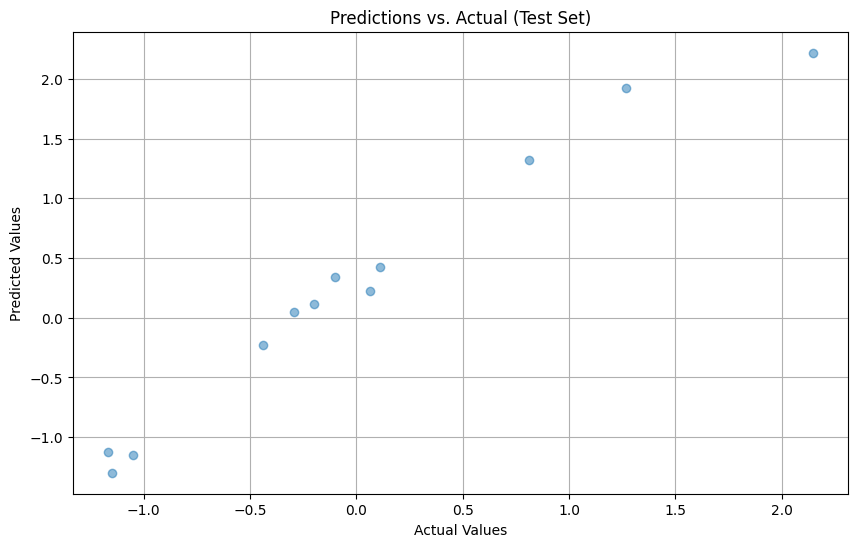

In [9]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, predictions_np, alpha=0.5)
plt.title('Predictions vs. Actual (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.savefig('scatter_plot.png')

plt.show()


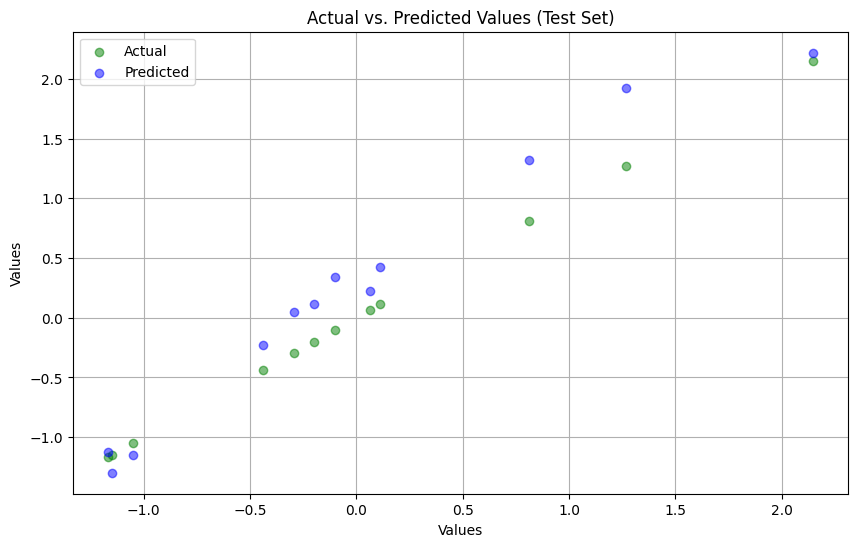

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_test_np, color='green', label='Actual', alpha=0.5)
plt.scatter(y_test_np, predictions_np, color='blue', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Values (Test Set)')
plt.xlabel('Values')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_pred.png')

plt.show()